In [1]:
import numpy as np
import xarray as xr
import dask.array as da
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [62]:
ds = xr.open_dataset("../data/critical_3d.nc")

nmodes = 4
modes = np.int64(np.unique(ds['mode'].values))[0:nmodes]

ds

<xarray.Dataset>
Dimensions:  (α: 400, β: 400, γ: 400)
Coordinates:
  * α        (α) float64 -2.75 -2.746 -2.742 -2.738 ... -1.212 -1.208 -1.204
  * β        (β) float64 0.0 0.00525 0.0105 0.01575 ... 2.079 2.084 2.09 2.095
  * γ        (γ) float64 0.0 0.0055 0.011 0.0165 ... 2.178 2.183 2.189 2.195
Data variables:
    match    (α, β, γ) float64 ...
    Q        (α, β, γ) float64 ...
    mode     (α, β, γ) float64 0.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0

In [63]:
tol = 0.25
mode_list = []

for mode in modes:
    print(mode, end=", ")
    mode_list.append(ds['match'].where((ds['mode'] == mode) & (np.abs(ds['match'] - 1.) < tol)))
    
modal = xr.concat(mode_list, dim='mode')
modal = modal.assign_coords({'mode': modes})
modal[:,:,:,0] = 0.;

0, 1, 2, 3, 

<xarray.DataArray 'match' (mode: 4, α: 400, β: 400, γ: 400)>
array([[[[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         ...,
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         ...,
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         ...,
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]],

        ...,

        [[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         ...,
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         ...,
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         ...,
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]]],


       [[[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         ...,
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         ...,
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         ...,
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]],

        ...,

        [[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         ...,
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         ...,
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         ...,
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]]],


       [[[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         ...,
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan,

In [122]:
ds = xr.Dataset()
ds["match"] = modal
ds["γcrit"] = modal["γ"][(np.abs(modal - 1.)).argmin(dim='γ', skipna=True)]
ds["γcrit"] = ds["γcrit"].where(ds["γcrit"] != 0.)
ds.to_netcdf("../data/processed/critical_3d.nc")

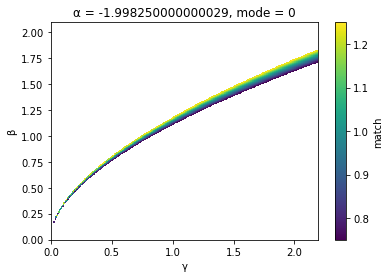

In [9]:
ds["match"].sel(mode=0).sel(α=-2., method='nearest').plot()

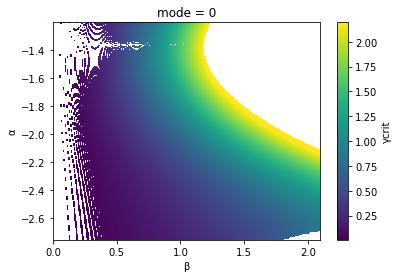

In [123]:
ds["γcrit"].isel(mode=0).plot()

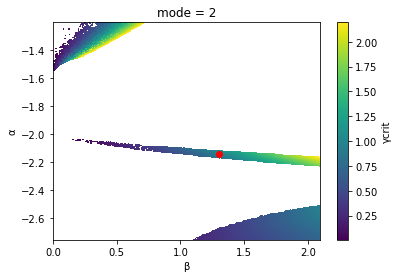

In [124]:
ds["γcrit"].isel(mode=2).plot()
plt.plot([1.3],[-2.14], "ro")

In [111]:
ds['match'].sel(mode=2, α=-2.14, β=1.3, γ=0.935, method='nearest')

<xarray.DataArray 'match' ()>
array(1.00124555)
Coordinates:
    γ        float64 0.935
    β        float64 1.302
    α        float64 -2.142
    mode     int64 2

<xarray.DataArray 'match' (γ: 400)>
array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])
Coordinates:
  * γ        (γ) float64 0.0 0.0055 0.011 0.0165 ... 2.178 2.183 2.189 2.195
    β        float64 0.9975
    α        float64 -2.142
    mode     int64 2